In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pathlib import Path
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from feature import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import bambi as bmb
from tensorflow.keras.models import load_model
from scipy.special import expit as invlogit

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [21]:
data =  pd.read_excel('bank-additional-full.xlsx')
data.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int32
 2   marital         41188 non-null  int32
 3   education       41188 non-null  int32
 4   default         41188 non-null  int32
 5   housing         41188 non-null  int32
 6   loan            41188 non-null  int32
 7   contact         41188 non-null  int32
 8   month           41188 non-null  int32
 9   day_of_week     41188 non-null  int32
 10  duration        41188 non-null  int64
 11  campaign        41188 non-null  int64
 12  pdays           41188 non-null  int64
 13  previous        41188 non-null  int64
 14  poutcome        41188 non-null  int32
 15  emp.var.rate    41188 non-null  int64
 16  cons.price.idx  41188 non-null  int64
 17  cons.conf.idx   41188 non-null  int64
 18  euribor3m 

age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   56    5        1          5        0        2     0        0      7   
41184   29    1        1          5        0        0     0        0      7   
41185   39    5        1          6        0        2     0        0      7   
41186   27    9        1          5        0        0     0        0      7   
41187   57    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         0     26         0         1             8   
1                1  ...         0     26         0         1             8   
2                1  ...         0     26         0         1             8   
3                1  ...         0     26         0         1             8   
4                1  ...         0     26         0         1             8   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         0     26         0         1             5   
41184            0  ...         0     26         0         1             5   
41185            0  ...         1     26         0         1             5   
41186            0  ...         0     26         0         1             5   
41187            0  ...         2     26         1         0             5   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0                  18             16        287            8  0  
1                  18             16        287            8  0  
2                  18             16        287            8  0  
3                  18             16        287            8  0  
4                  18             16        287            8  0  
...               ...            ...        ...          ... ..  
41183              25              0        171            0  1  
41184              25              0        171            0  0  
41185              25              0        171            0  0  
41186              25              0        171            0  1  
41187              25              0        171            0  0  

[41188 rows x 21 columns]

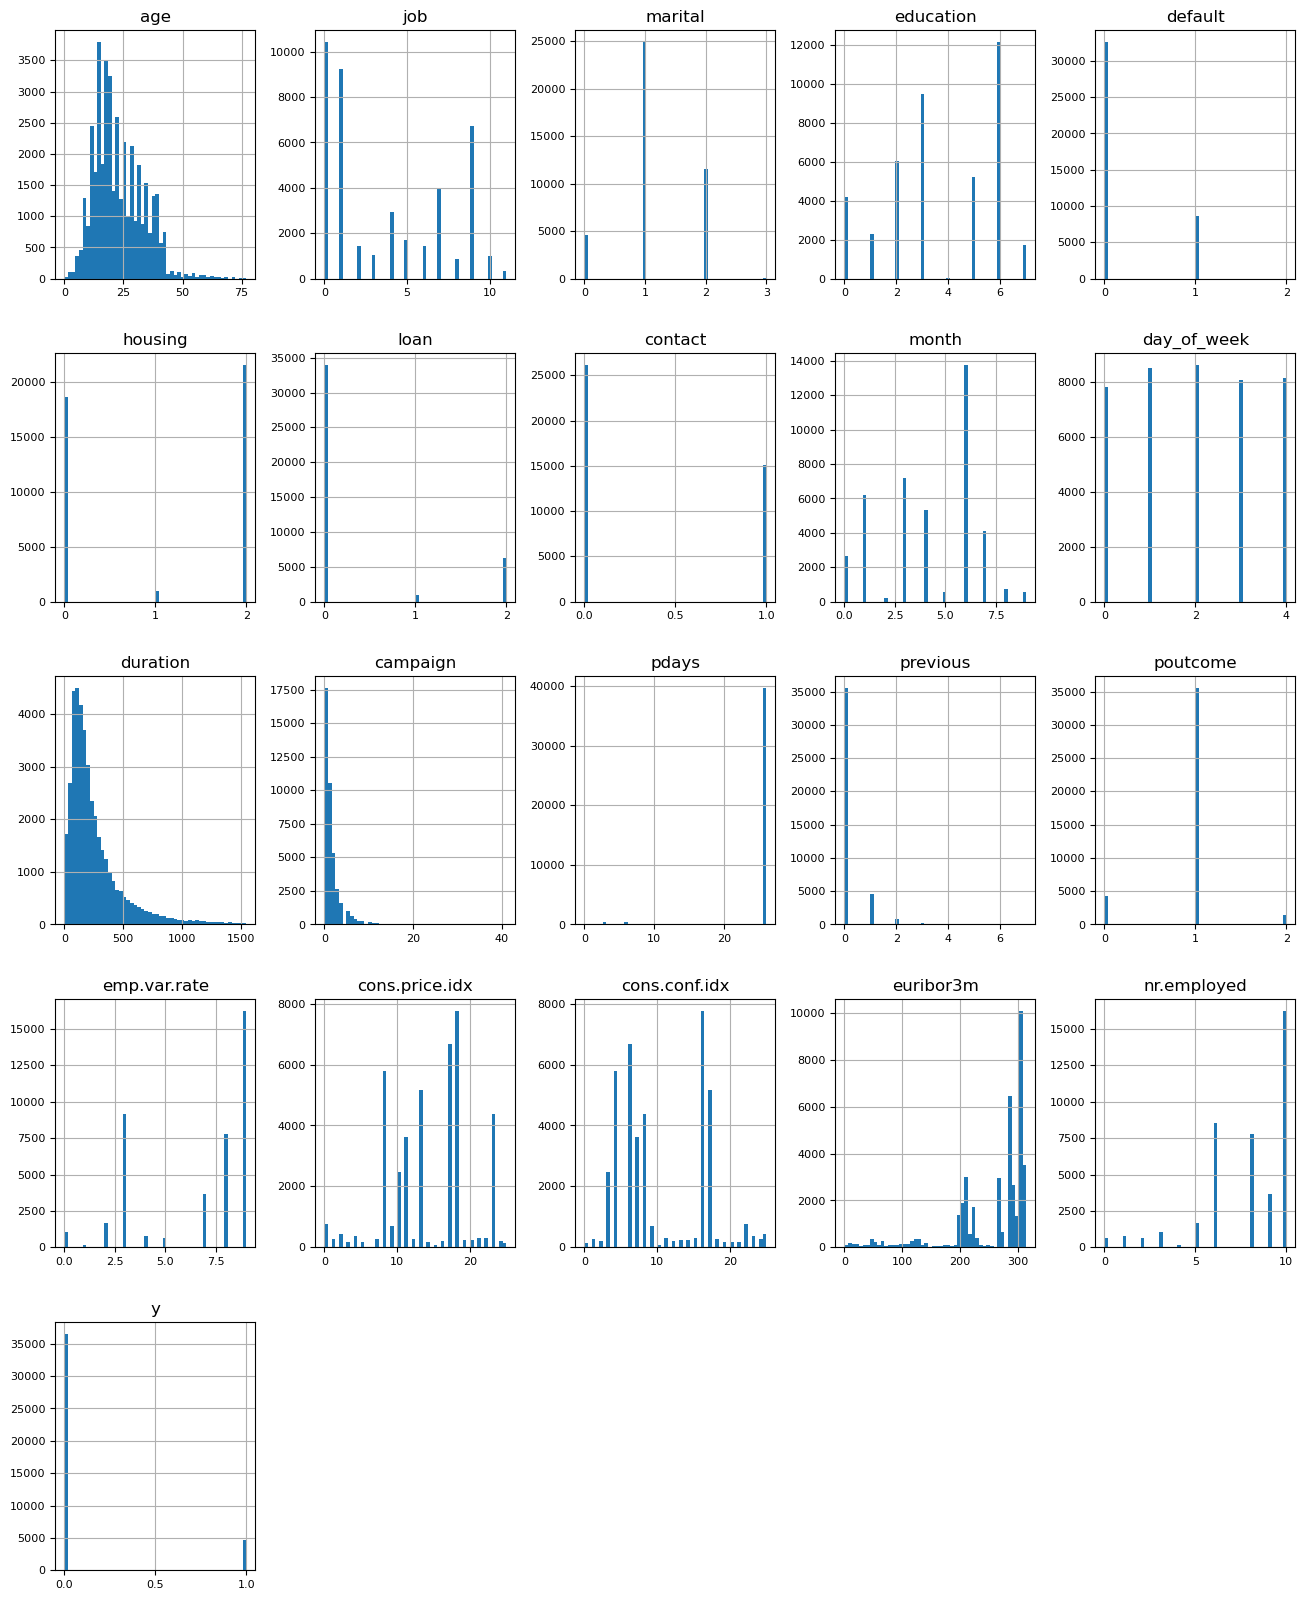

In [4]:
def data_preprocessing(data):
    # Display DataFrame info
    print("DataFrame Info:")
    data.info()

    # Display DataFrame description
    print("\nDataFrame Description:")
    print(data.describe())

    # Display null values count
    print("\nNull Values Count:")
    print(data.isnull().sum())

    # Display duplicated rows count
    print("\nDuplicated Rows Count:", data.duplicated().sum())

    # Display number of unique values in each column
    print("\nNumber of Unique Values in Each Column:")
    print(data.nunique())
    
    # Plot histrogram for all column
    data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
    return data
data = data_preprocessing(data)
data


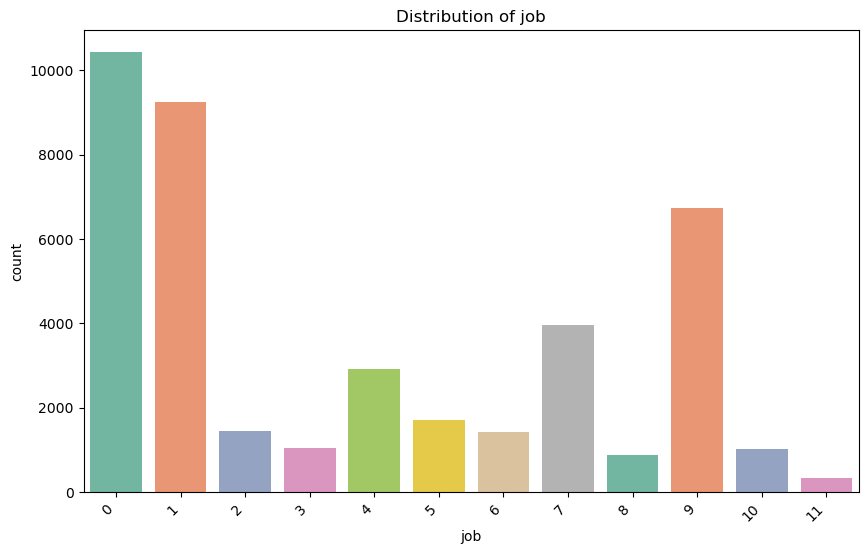

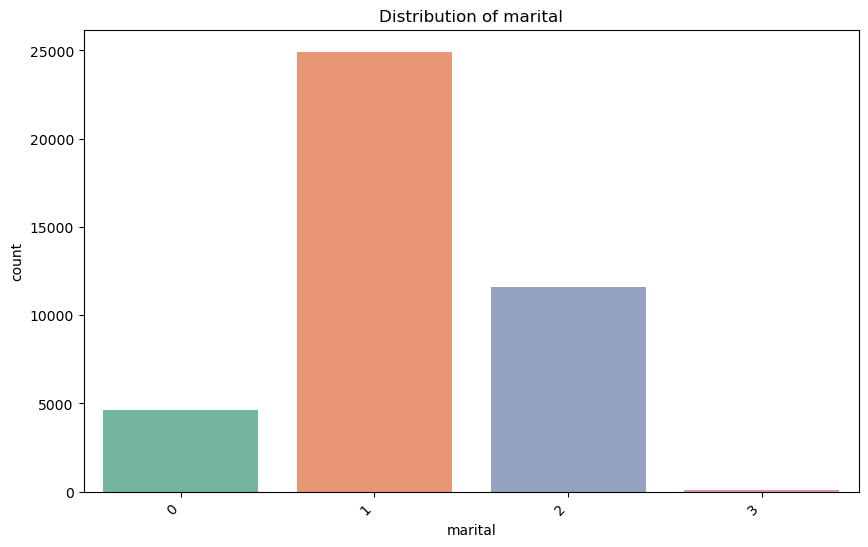

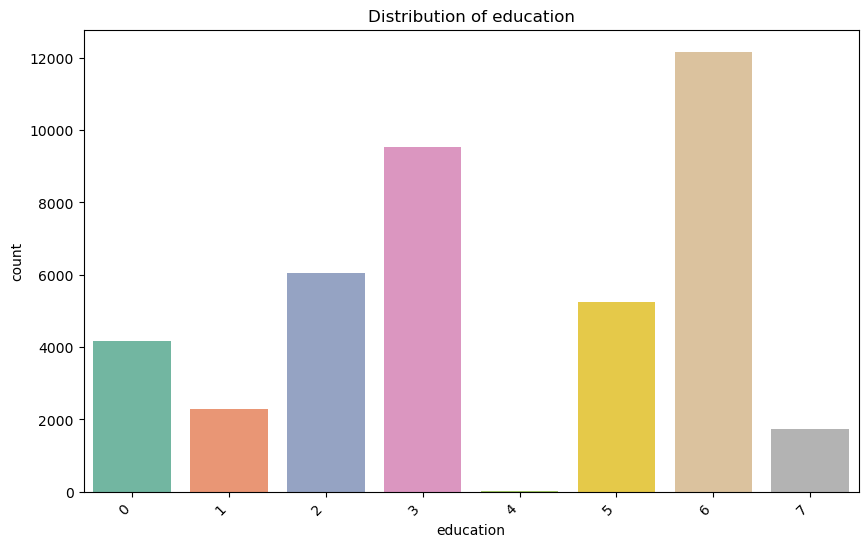

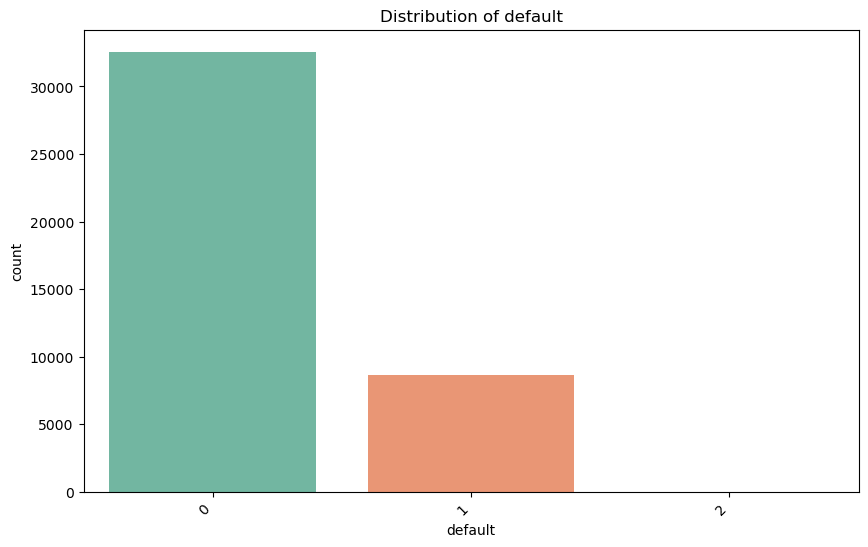

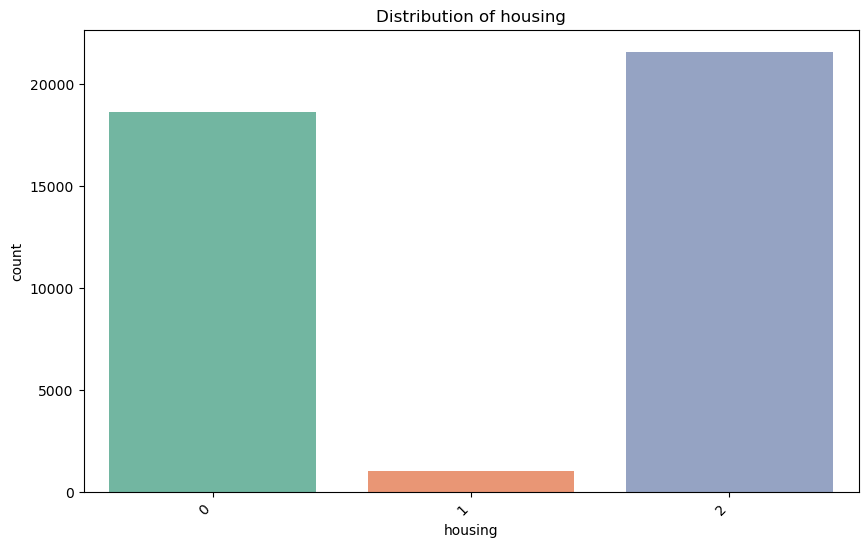

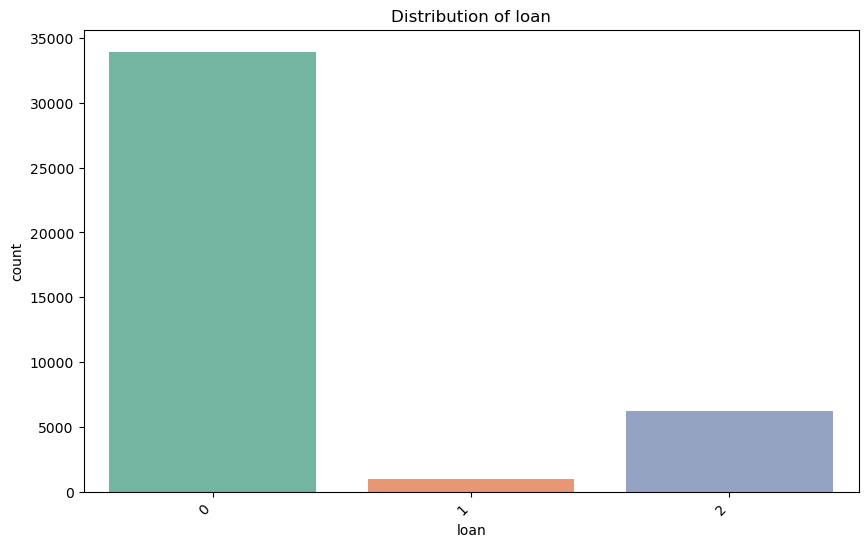

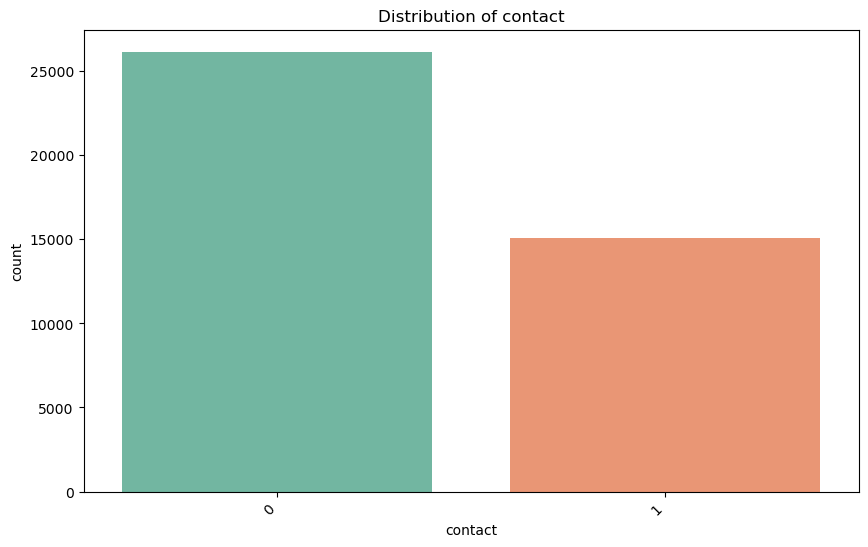

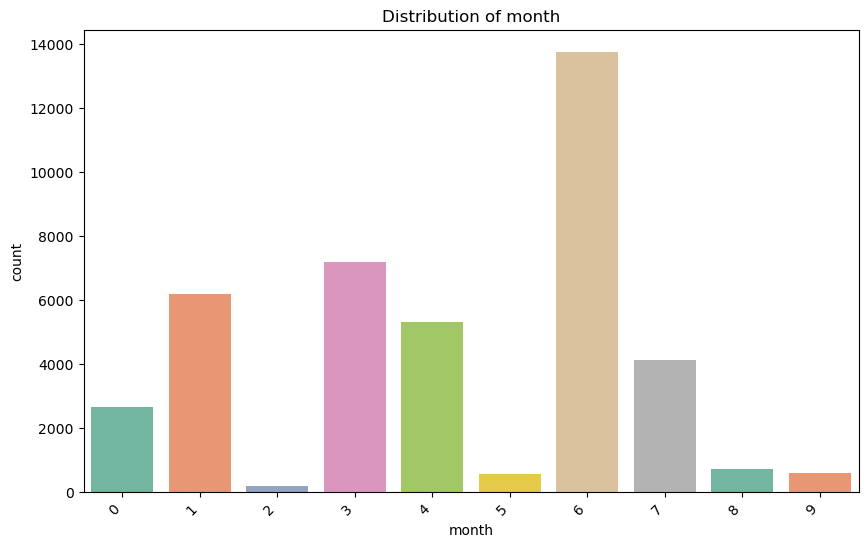

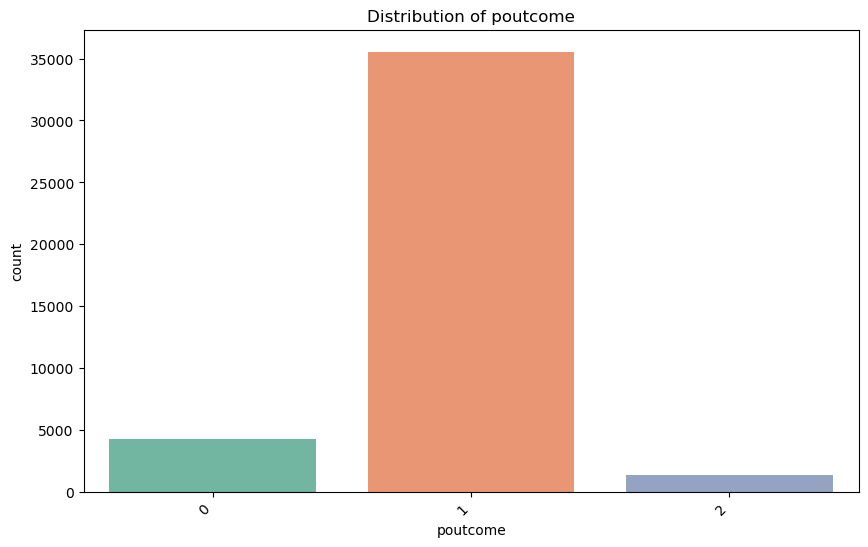

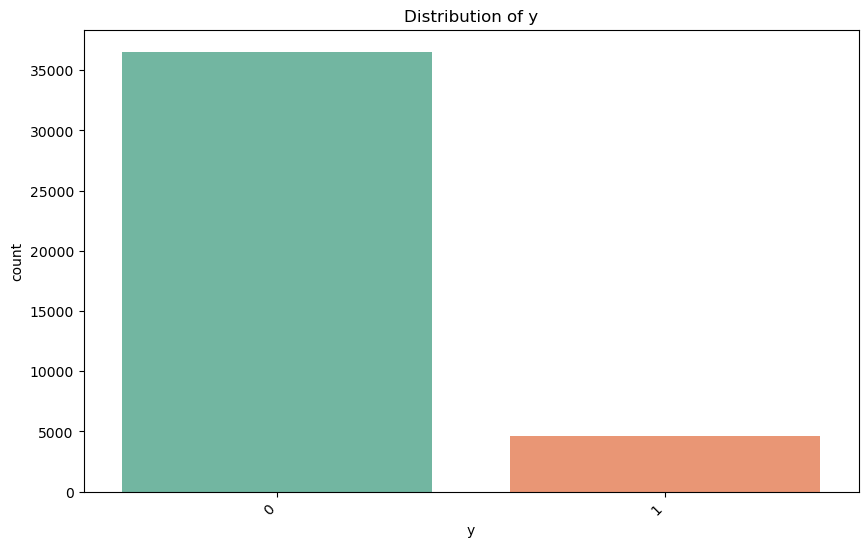

In [5]:
# Visualize the distribution of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}')
    plt.show()

In [22]:
 # Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Concatenate the label-encoded features with the target variable
data = pd.concat([data], axis=1)

data

age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   56    5        1          5        0        2     0        0      7   
41184   29    1        1          5        0        0     0        0      7   
41185   39    5        1          6        0        2     0        0      7   
41186   27    9        1          5        0        0     0        0      7   
41187   57    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                1  ...         0     26         0         1             8   
1                1  ...         0     26         0         1             8   
2                1  ...         0     26         0         1             8   
3                1  ...         0     26         0         1             8   
4                1  ...         0     26         0         1             8   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         0     26         0         1             5   
41184            0  ...         0     26         0         1             5   
41185            0  ...         1     26         0         1             5   
41186            0  ...         0     26         0         1             5   
41187            0  ...         2     26         1         0             5   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0                  18             16        287            8  0  
1                  18             16        287            8  0  
2                  18             16        287            8  0  
3                  18             16        287            8  0  
4                  18             16        287            8  0  
...               ...            ...        ...          ... ..  
41183              25              0        171            0  1  
41184              25              0        171            0  0  
41185              25              0        171            0  0  
41186              25              0        171            0  1  
41187              25              0        171            0  0  

[41188 rows x 21 columns]

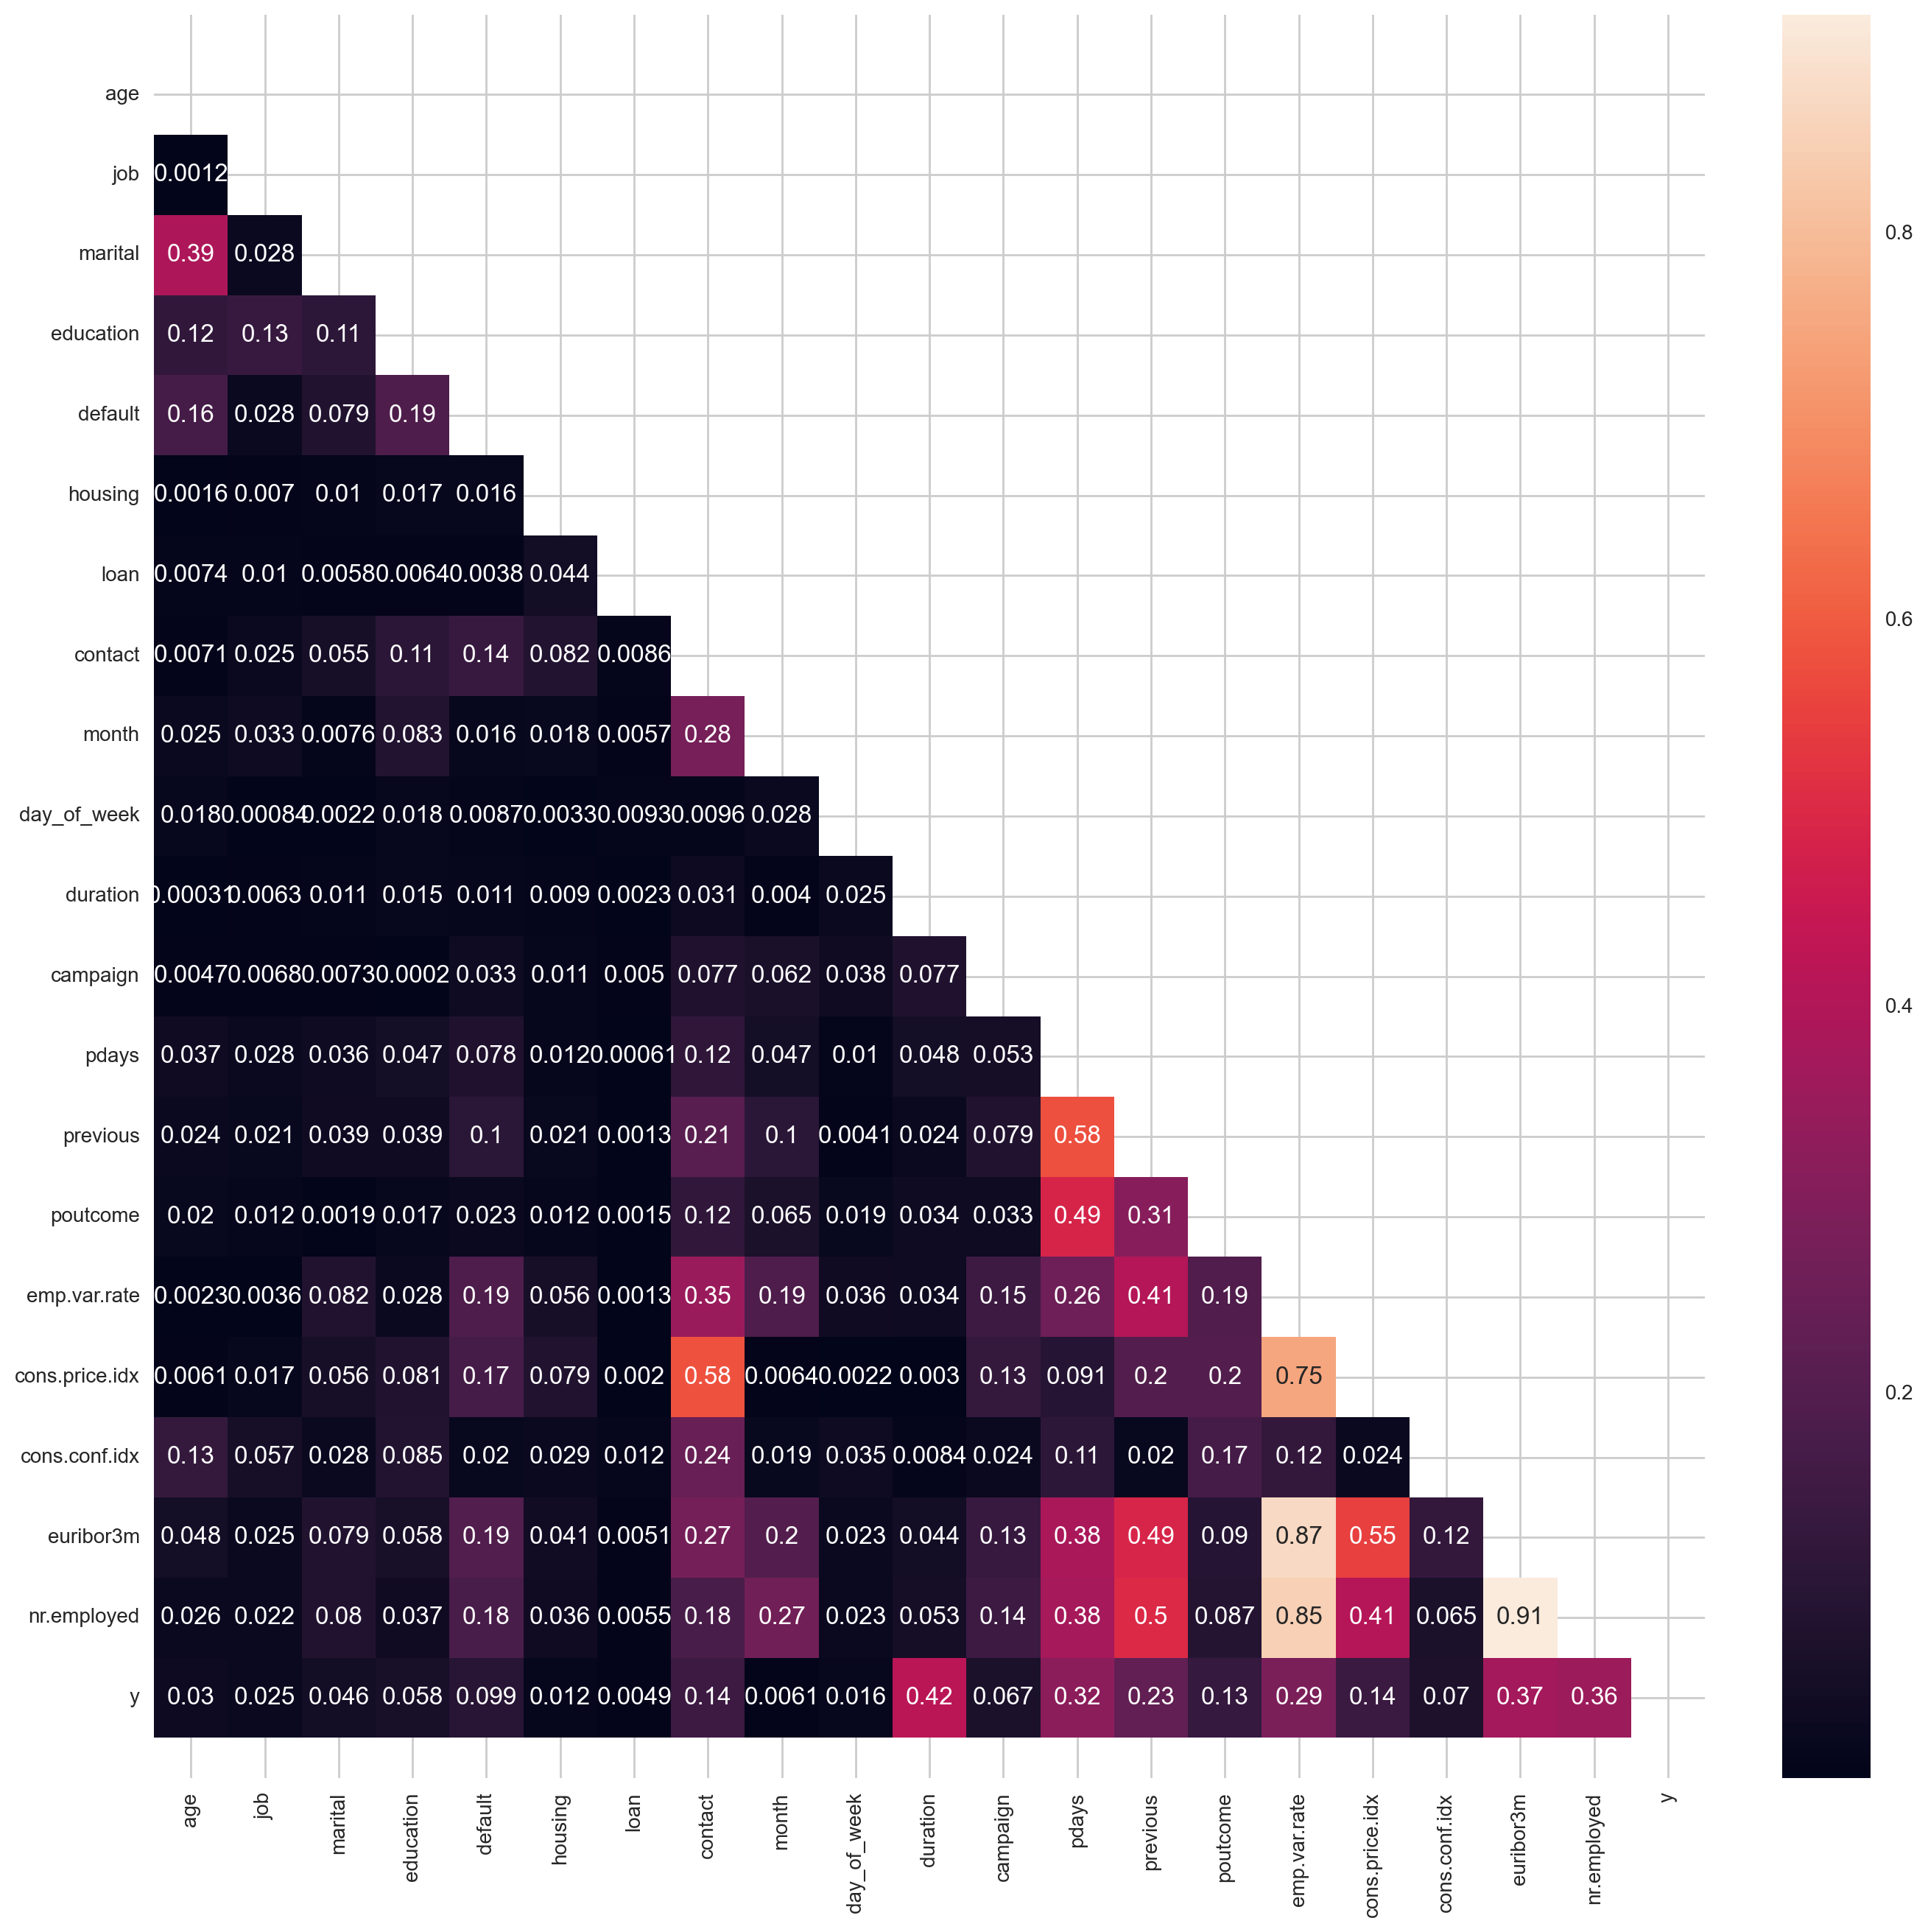

In [28]:
plt.figure(figsize=(13, 13))
corr = data.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

# Selecting feature using random forest

In [4]:
# separating the data & label
X = data.drop(columns = ['y'],axis=1)
y = data['y']
 

In [5]:
accuracy_rf = feature_selection_with_RandomForest(X, y)

Feature Importance:
           Feature  Importance
10        duration    0.408628
18       euribor3m    0.099142
19     nr.employed    0.085221
0              age    0.058806
15    emp.var.rate    0.046358
17   cons.conf.idx    0.036068
1              job    0.030119
3        education    0.029024
11        campaign    0.028979
9      day_of_week    0.026513
16  cons.price.idx    0.025542
8            month    0.022266
14        poutcome    0.019225
12           pdays    0.018437
2          marital    0.015362
7          contact    0.012669
5          housing    0.012021
6             loan    0.009273
13        previous    0.008248
4          default    0.008100
Accuracy on the test set with selected features using Random Forest: 0.90


In [5]:
# seleting the important features with importance value >= 0.05
X = data[['nr.employed', 'euribor3m', 'age', 'duration']]
y = data['y']

# Model 1 using logit link function

In [103]:
# Initialize the model
model_1 = bmb.Model("y ~ nr.employed + euribor3m + age + duration", data, family="bernoulli")
model_1

       Formula: y ~ nr.employed + euribor3m + age + duration
        Family: bernoulli
          Link: p = logit
  Observations: 41188
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 13.9416)
            nr.employed ~ Normal(mu: 0.0, sigma: 1.0184)
            euribor3m ~ Normal(mu: 0.0, sigma: 0.0364)
            age ~ Normal(mu: 0.0, sigma: 0.2399)
            duration ~ Normal(mu: 0.0, sigma: 0.0105)

In [104]:
result_1 = model_1.fit(draws=1000, idata_kwargs={"log_likelihood": True})

Modeling the probability that y==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, nr.employed, euribor3m, age, duration]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10956 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [105]:
# Save necessary attributes of the model
model_data = {'formula': model_1.formula,'fit_results': result_1}

model_pkl_file = "model_1.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model_data, file)



In [6]:
# load model from pickle file
with open("model_1.pkl", 'rb') as file:  
    loaded_model_data = pickle.load(file)

model_1 = bmb.Model(loaded_model_data['formula'], data)
result_1 = loaded_model_data['fit_results']

In [5]:
result_1=model.build()

Sampling: [Intercept, age, duration, euribor3m, nr.employed]


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

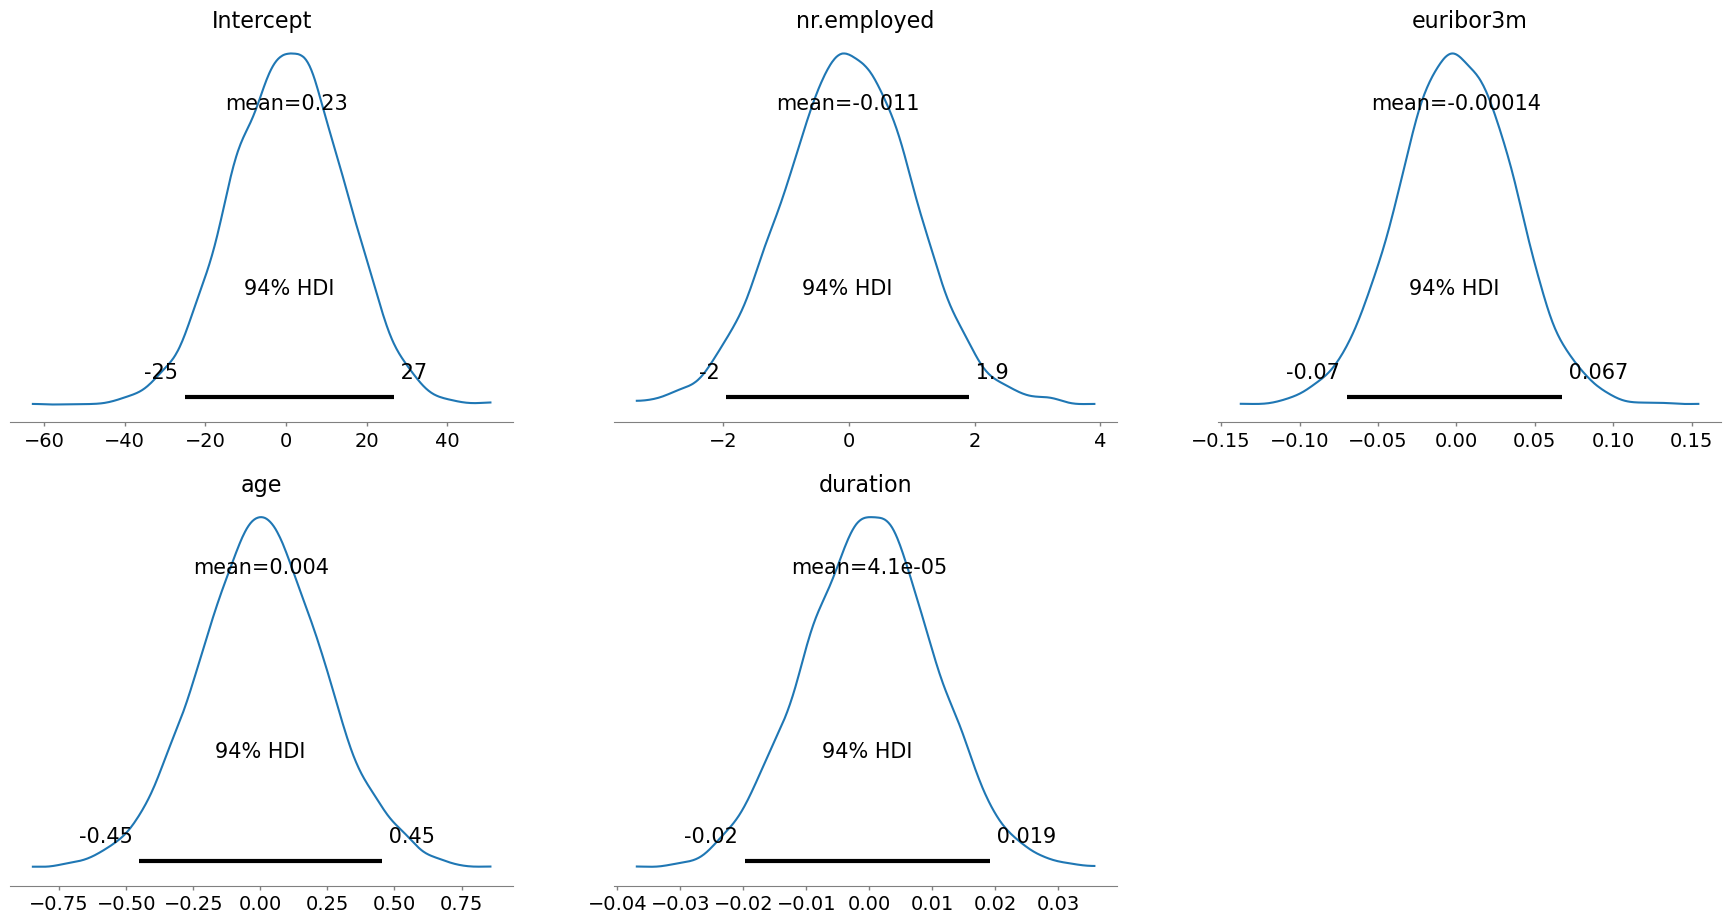

In [106]:
model_1.plot_priors()

# Convergence diagnostics plots

In [17]:
az.plot_autocorr(result_1)

plt.show()

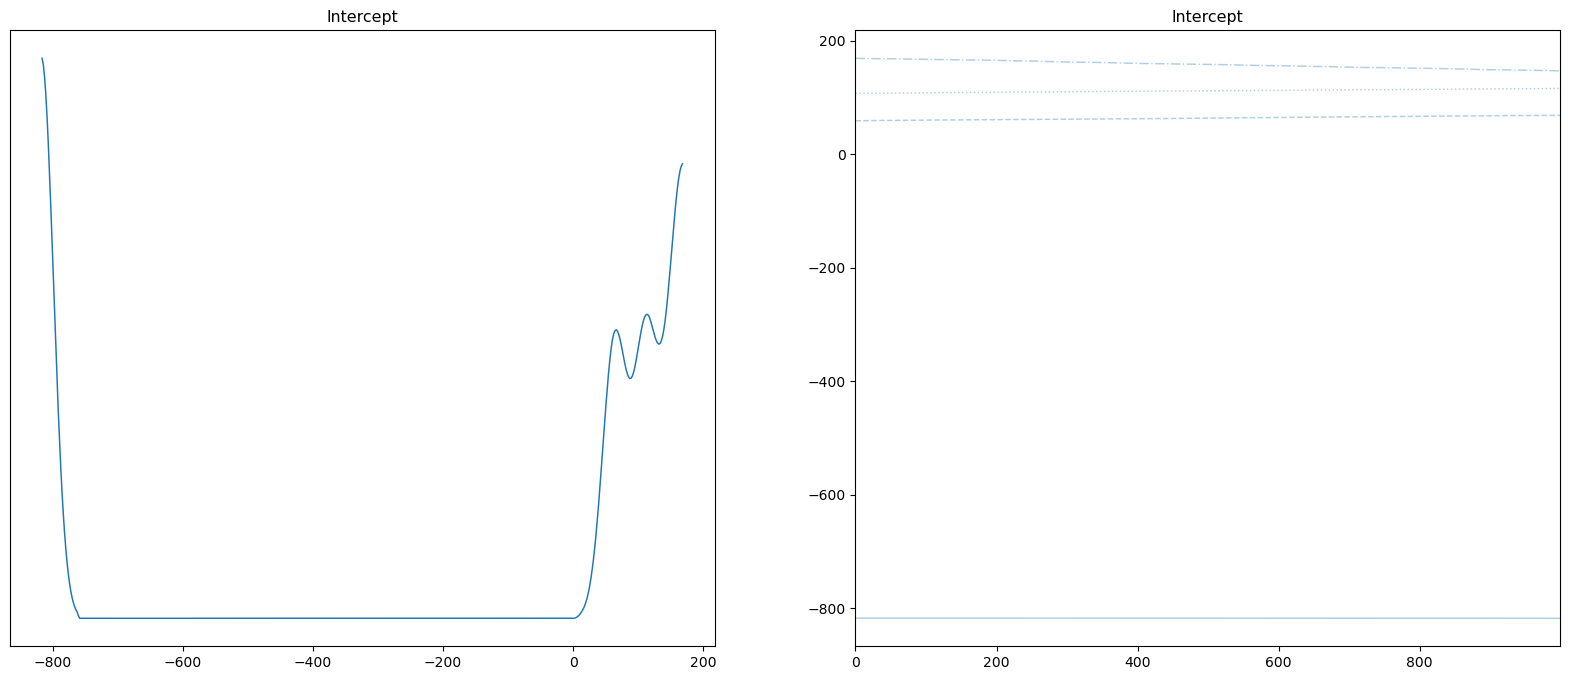

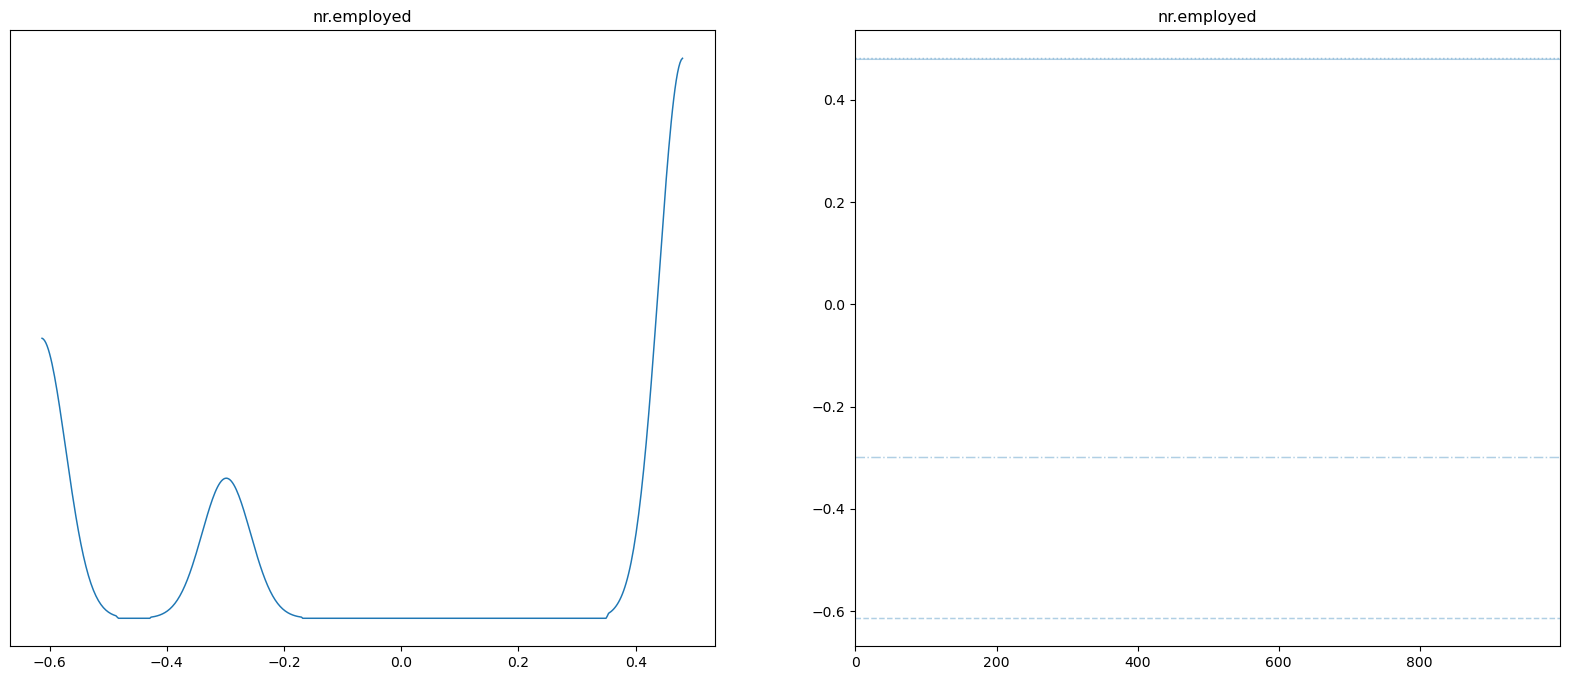

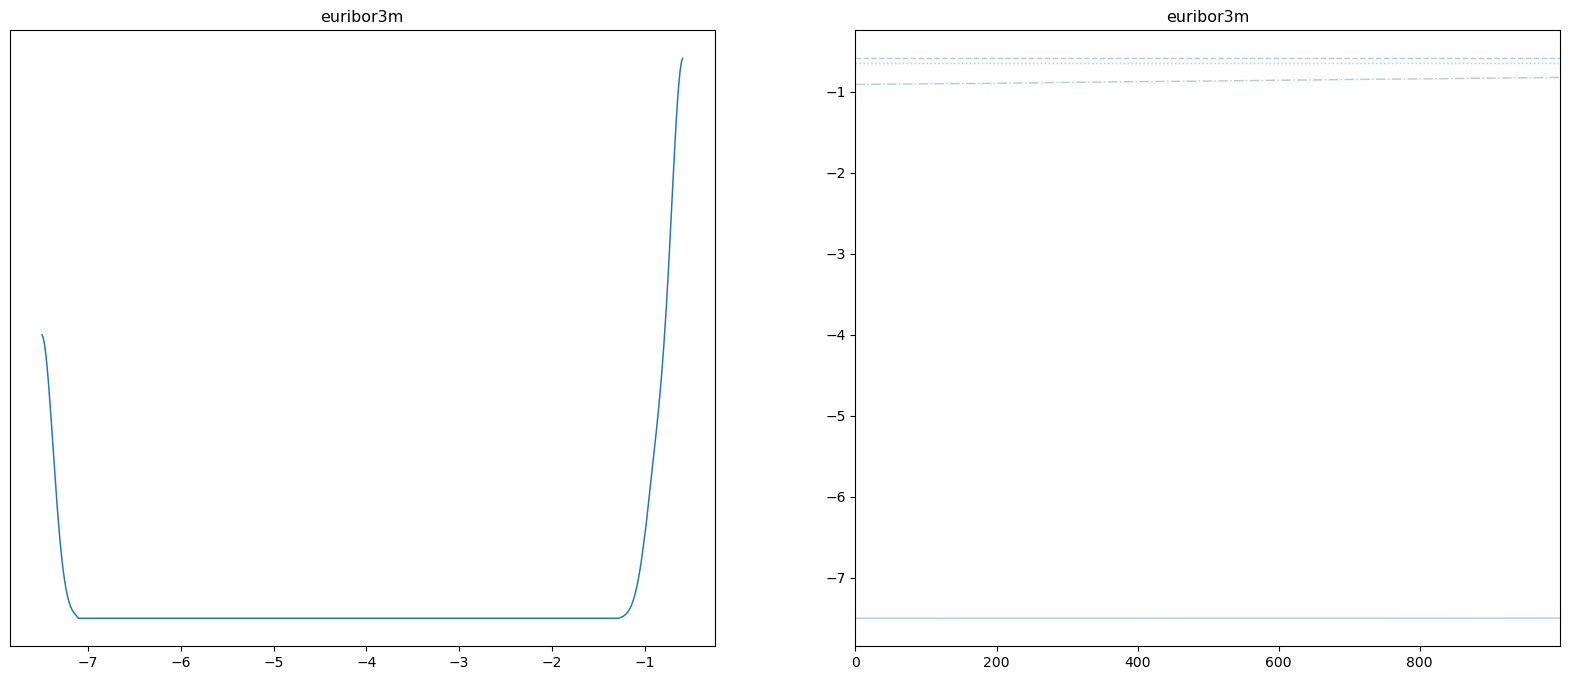

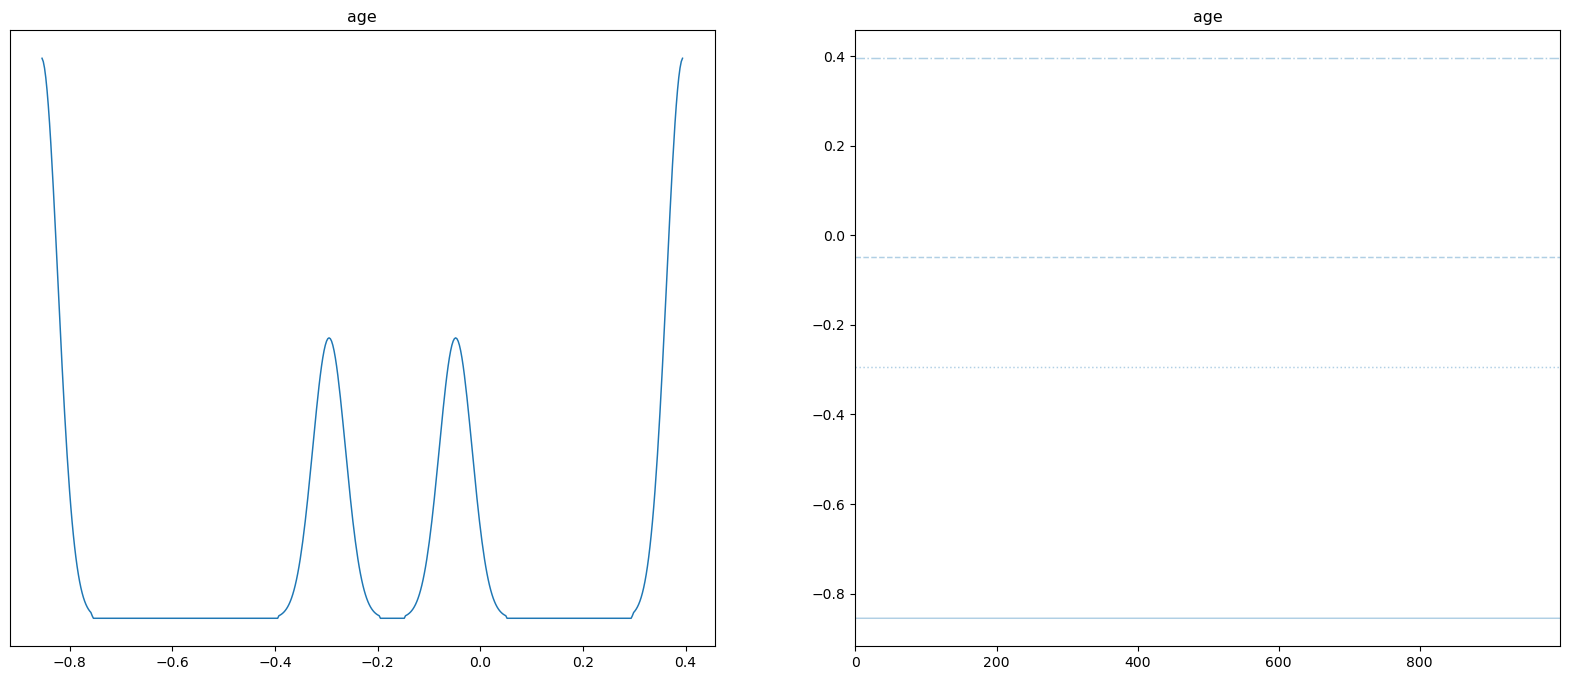

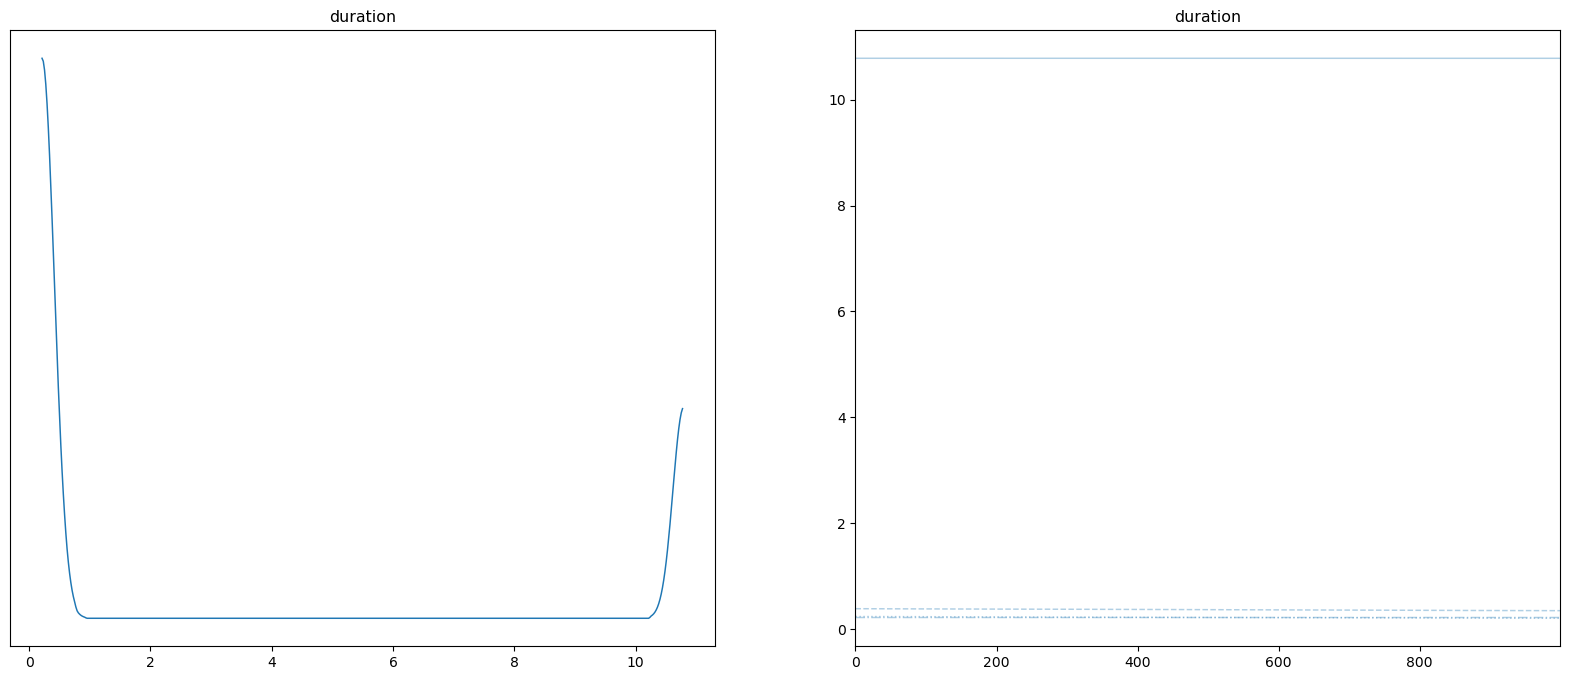

In [107]:
var_names = ('Intercept','nr.employed', 'euribor3m', 'age', 'duration')

# Loop through each variable and create separate plots
for var_name in var_names:
    az.plot_trace(result_1, var_names=var_name, combined=True, compact=True,figsize = (20, 8))
    plt.show()

In [108]:
az.summary(result_1)

mean       sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept   -120.808  403.643 -817.562  164.530    201.011  153.911       4.0   
nr.employed    0.012    0.481   -0.614    0.481      0.240    0.183       4.0   
euribor3m     -2.399    2.948   -7.500   -0.586      1.468    1.124       4.0   
age           -0.201    0.451   -0.855    0.395      0.225    0.172       5.0   
duration       2.896    4.555    0.209   10.784      2.268    1.737       4.0   

             ess_tail  r_hat  
Intercept        11.0   4.56  
nr.employed      14.0   3.32  
euribor3m        11.0   4.25  
age              12.0   3.09  
duration         11.0   4.06

In [109]:
# show the names of all variables stored in the InferenceData object
list(result_1.posterior.data_vars)

['Intercept', 'nr.employed', 'euribor3m', 'age', 'duration']

In [110]:
model_1.backend.model

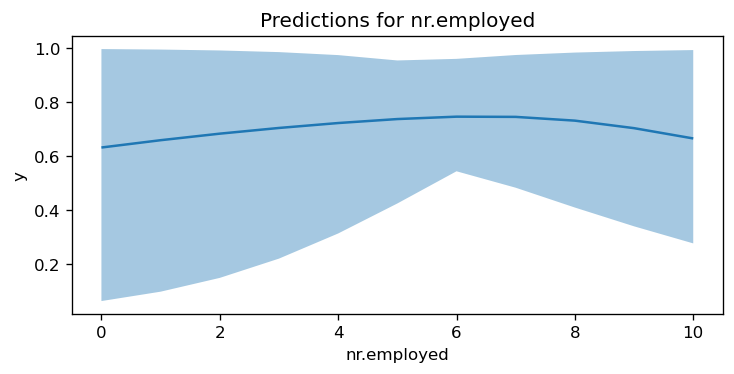

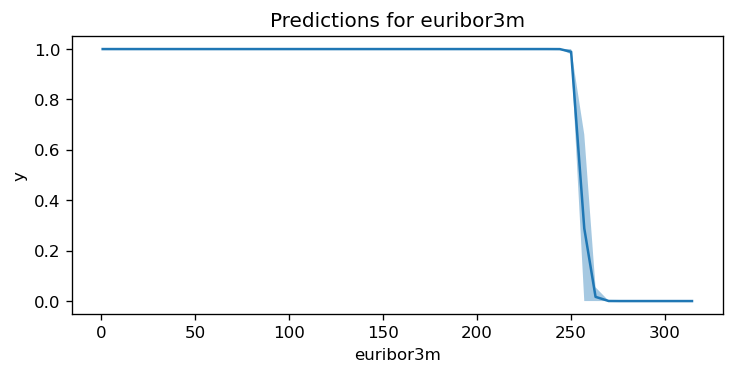

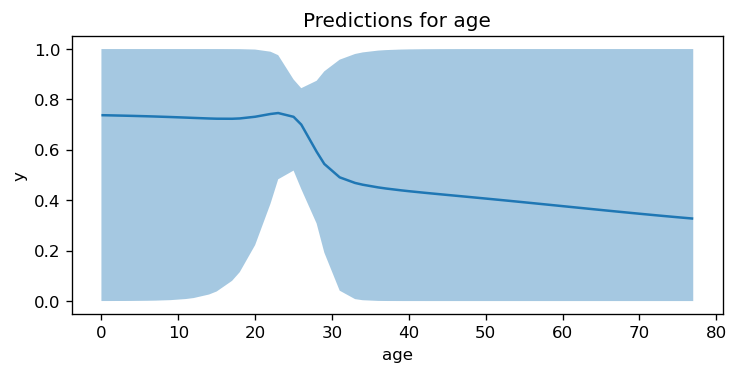

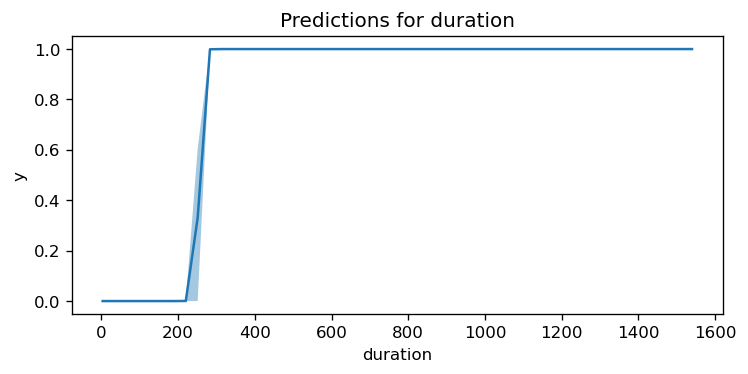

In [111]:
var_names = ('nr.employed', 'euribor3m', 'age', 'duration')

# Loop through each variable and create separate plots
for var_name in var_names:
    fig, ax = plt.subplots(figsize=(7, 3), dpi=120)
    bmb.interpret.plot_predictions(model_1, result_1, var_name, ax=ax)
    ax.set_title(f"Predictions for {var_name}")
    plt.show()


In [112]:
model_1.predict(result_1, data=X)

In [113]:
posterior = az.extract_dataset(result_1)

In [114]:
posterior

<xarray.Dataset>
Dimensions:      (sample: 4000, y_obs: 41188)
Coordinates:
  * y_obs        (y_obs) int32 0 1 2 3 4 5 ... 41183 41184 41185 41186 41187
  * sample       (sample) object MultiIndex
  * chain        (sample) int32 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw         (sample) int32 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    Intercept    (sample) float64 -817.3 -817.3 -817.3 ... 147.1 147.0 147.0
    nr.employed  (sample) float64 0.479 0.479 0.479 ... -0.2982 -0.2982 -0.2982
    euribor3m    (sample) float64 -7.501 -7.501 -7.501 ... -0.8229 -0.8229
    age          (sample) float64 -0.8552 -0.8552 -0.8552 ... 0.3952 0.3952
    duration     (sample) float64 10.78 10.78 10.78 ... 0.2186 0.2186 0.2186
    y_mean       (y_obs, sample) float64 5.384e-81 5.391e-81 ... 1.0 1.0
Attributes:
    created_at:                  2024-02-17T00:49:19.886905
    arviz_version:               0.17.0
    inference_library:           pymc
    inference_library_version:   5.10.3
    sampling_time:               10956.414767980576
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.13.0

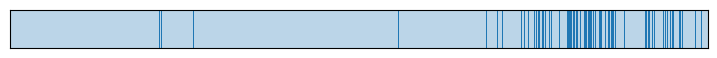

In [115]:
model_1.predict(result_1, kind="pps")
ax = az.plot_separation(result_1, y='y', figsize=(9,0.5))

# Model 2 using probit link function

In [6]:
model_2 = bmb.Model("y ~ nr.employed + euribor3m + age + duration", data, family="bernoulli",link="probit")
model_2

       Formula: y ~ nr.employed + euribor3m + age + duration
        Family: bernoulli
          Link: p = probit
  Observations: 41188
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 13.9416)
            nr.employed ~ Normal(mu: 0.0, sigma: 1.0184)
            euribor3m ~ Normal(mu: 0.0, sigma: 0.0364)
            age ~ Normal(mu: 0.0, sigma: 0.2399)
            duration ~ Normal(mu: 0.0, sigma: 0.0105)

In [7]:
result_2 = model_2.fit(idata_kwargs={"log_likelihood": True})

Modeling the probability that y==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, nr.employed, euribor3m, age, duration]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5420 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [16]:
# Save necessary attributes of the model
model_data = {'formula': model_2.formula,'fit_results': result_3}

model_pkl_file = "model_2.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model_data, file)


In [23]:
# load model from pickle file
with open("model_2.pkl", 'rb') as file:  
    loaded_model_data = pickle.load(file)

model_2 = bmb.Model(loaded_model_data['formula'], data)
result_2 = loaded_model_data['fit_results']

Sampling: [Intercept, age, duration, euribor3m, nr.employed]


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

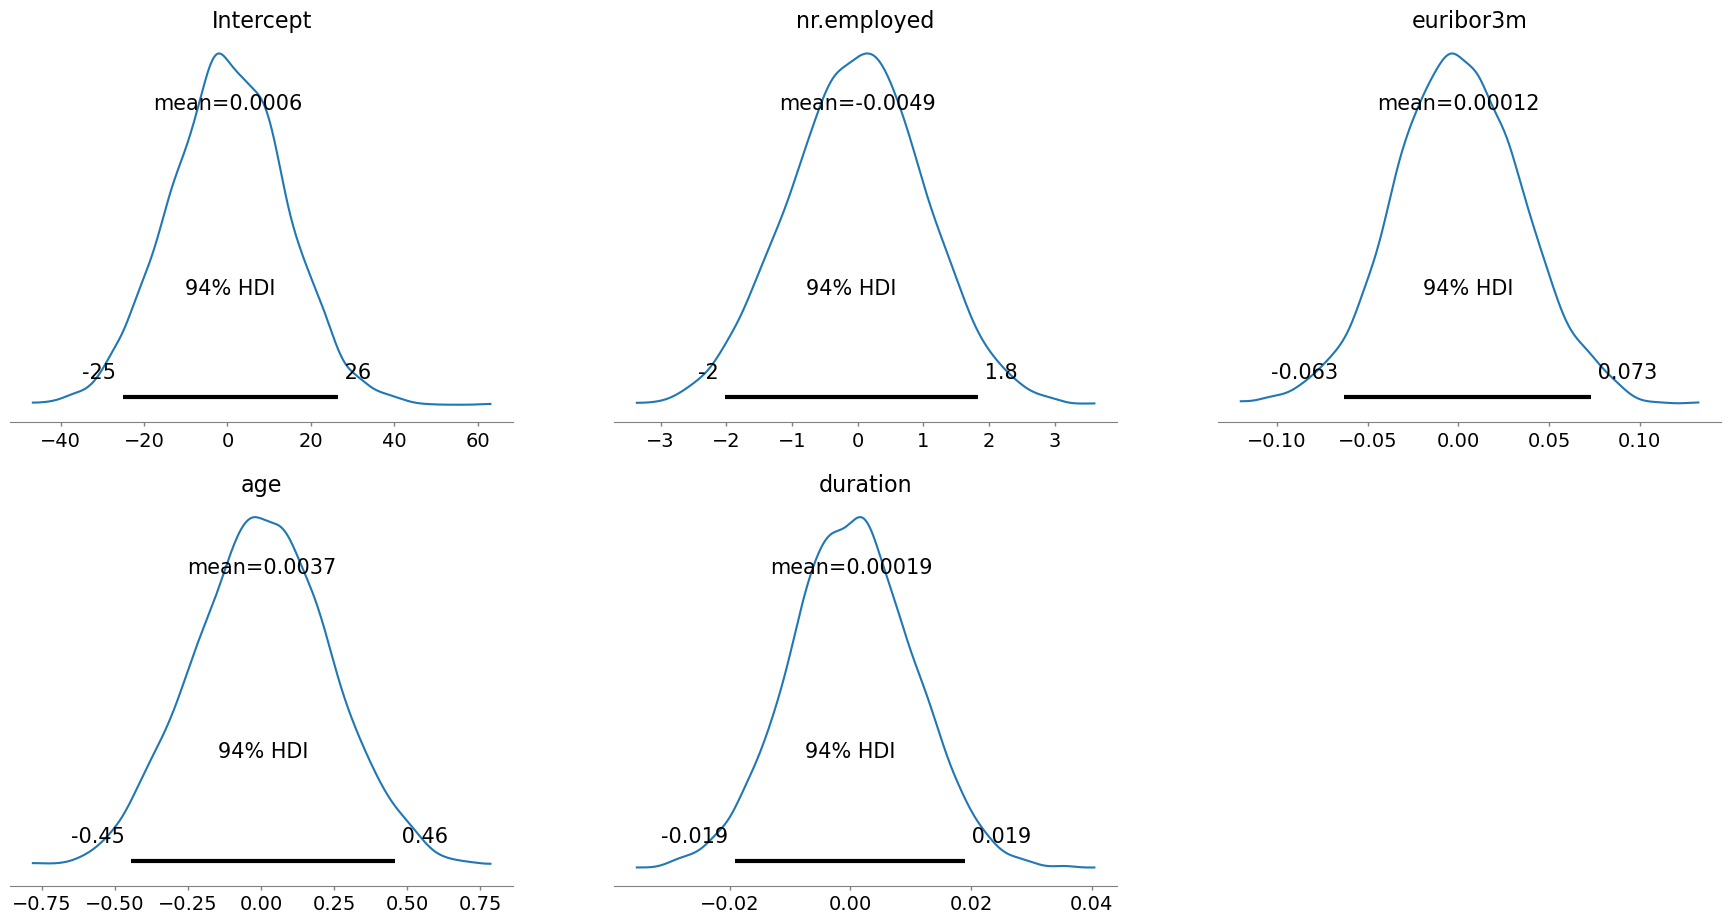

In [8]:
model_2.plot_priors()

In [24]:
az.plot_autocorr(result_2)

plt.show()

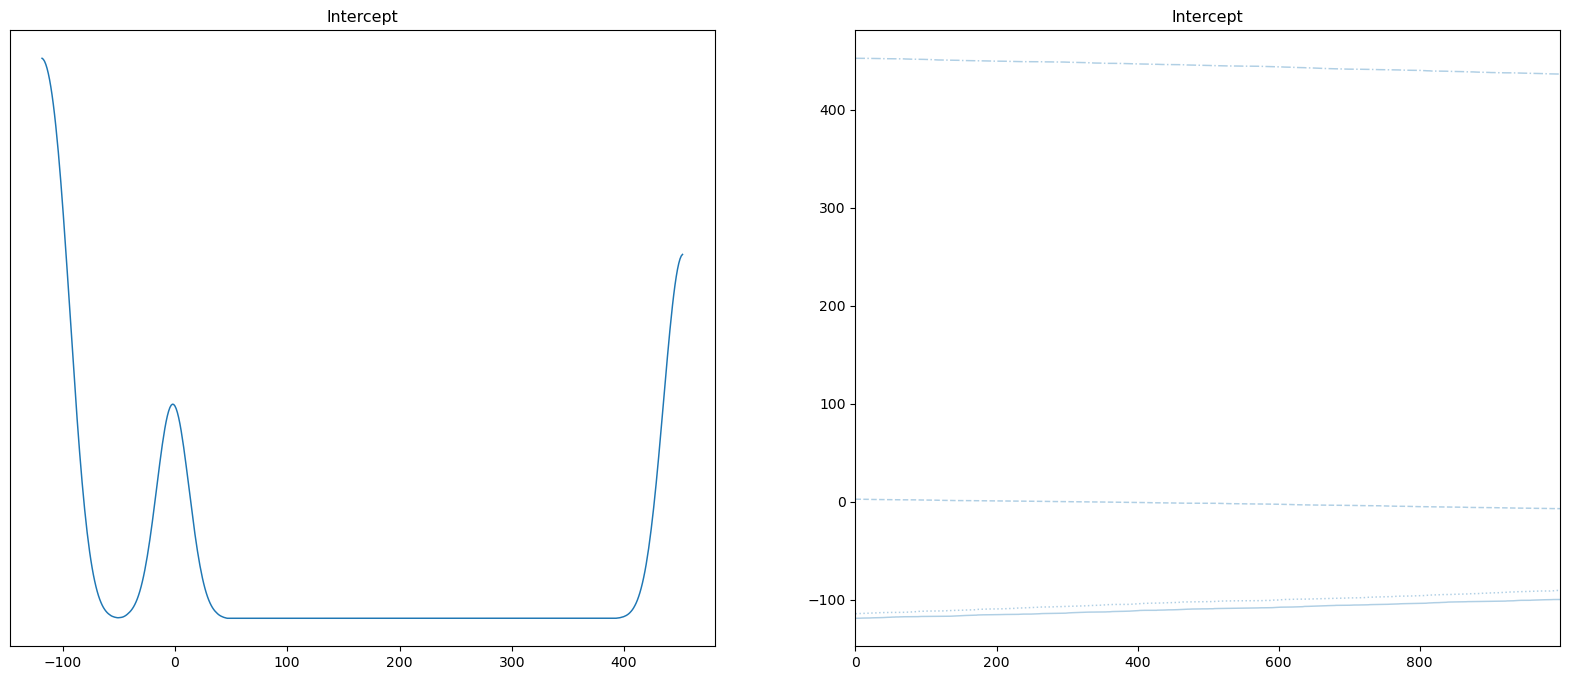

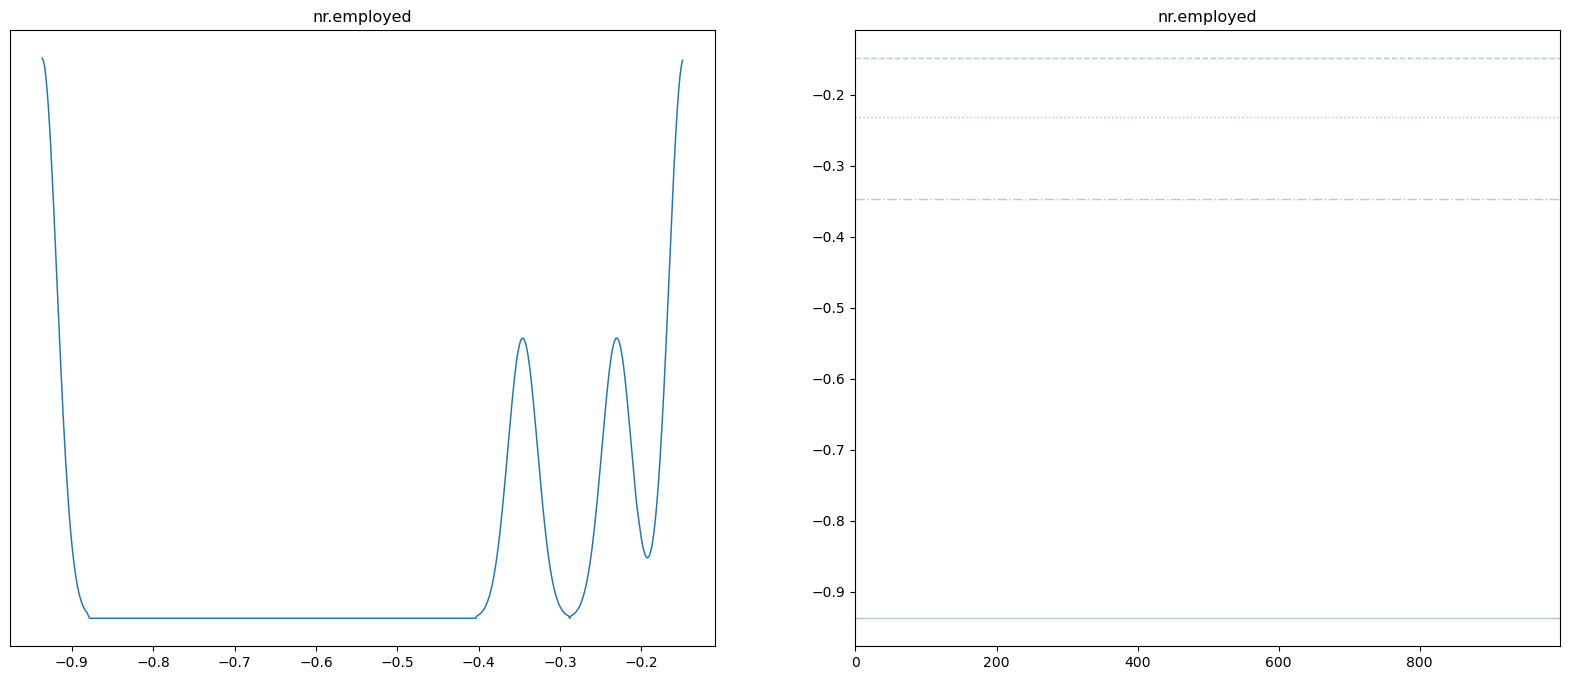

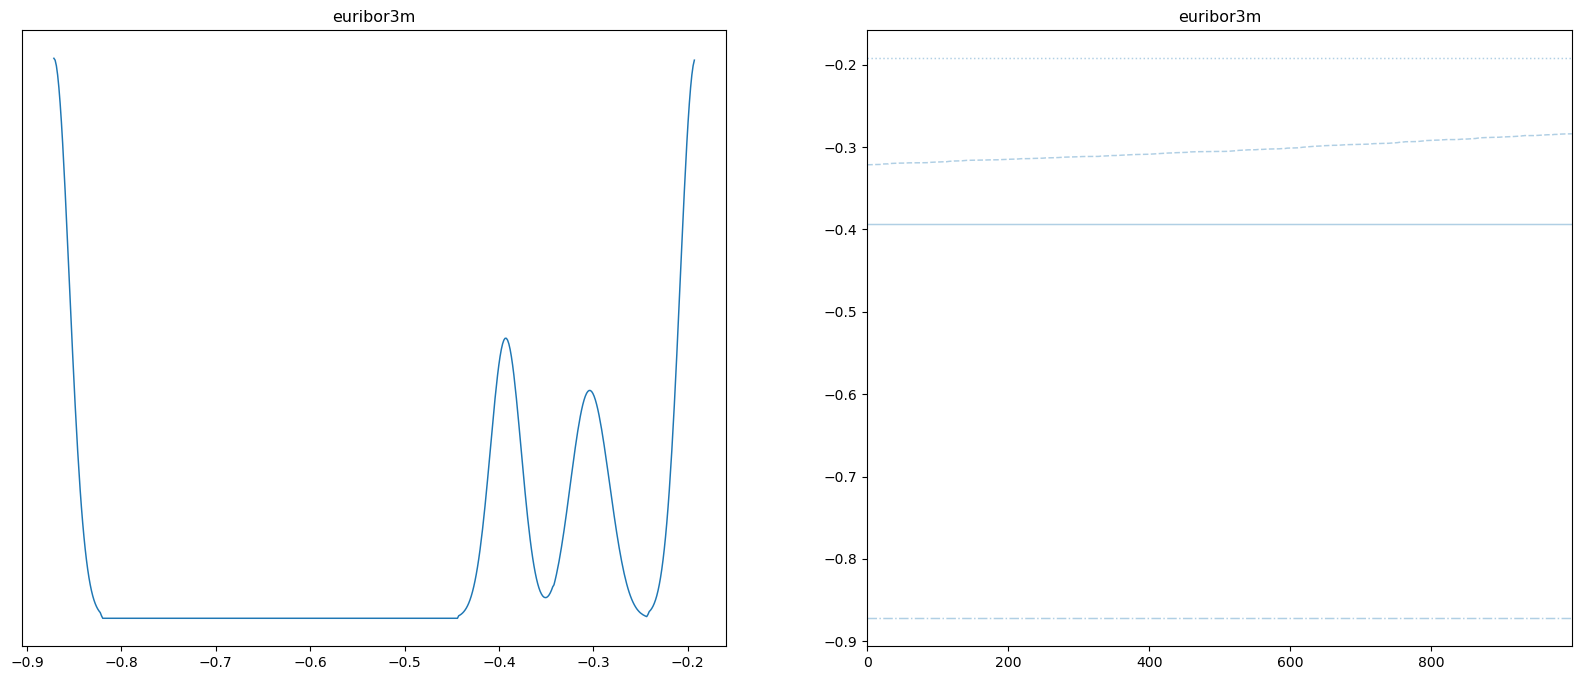

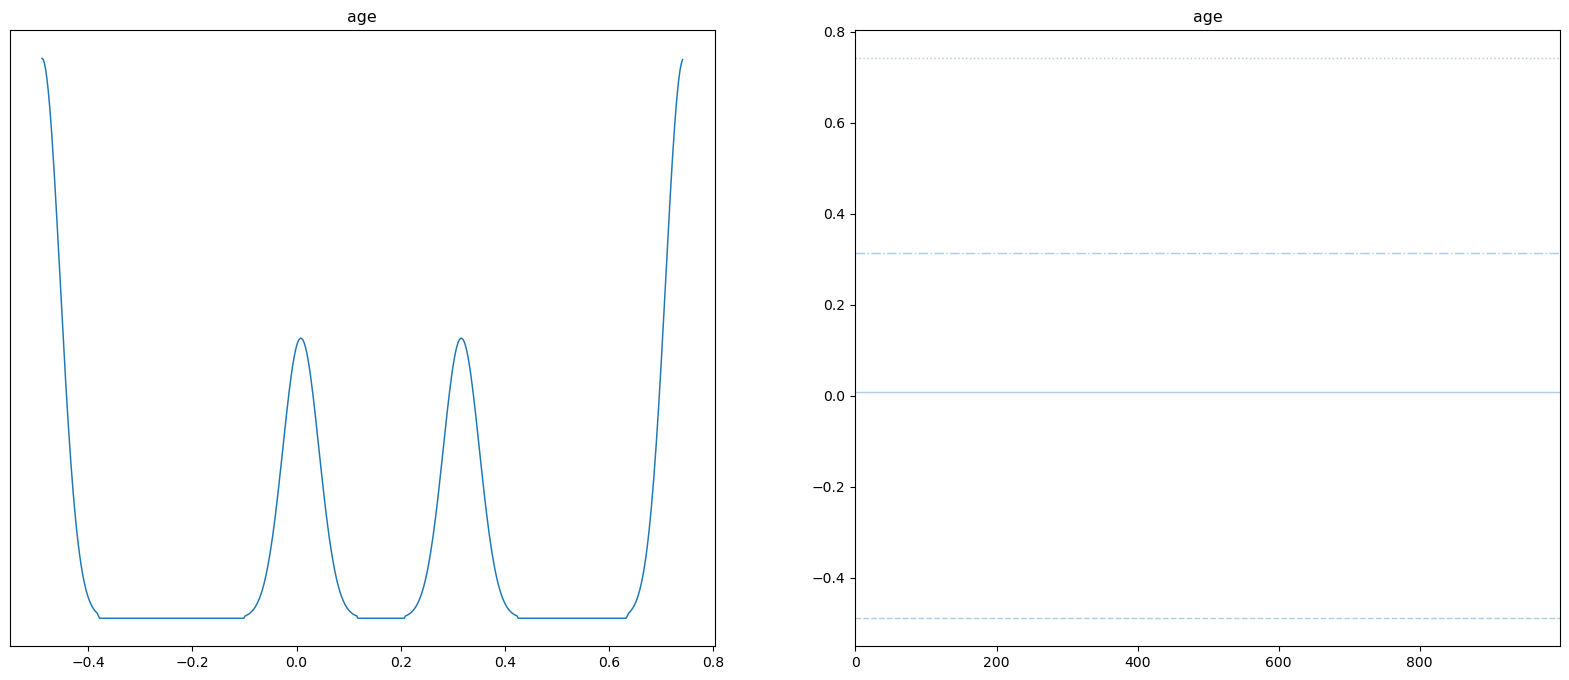

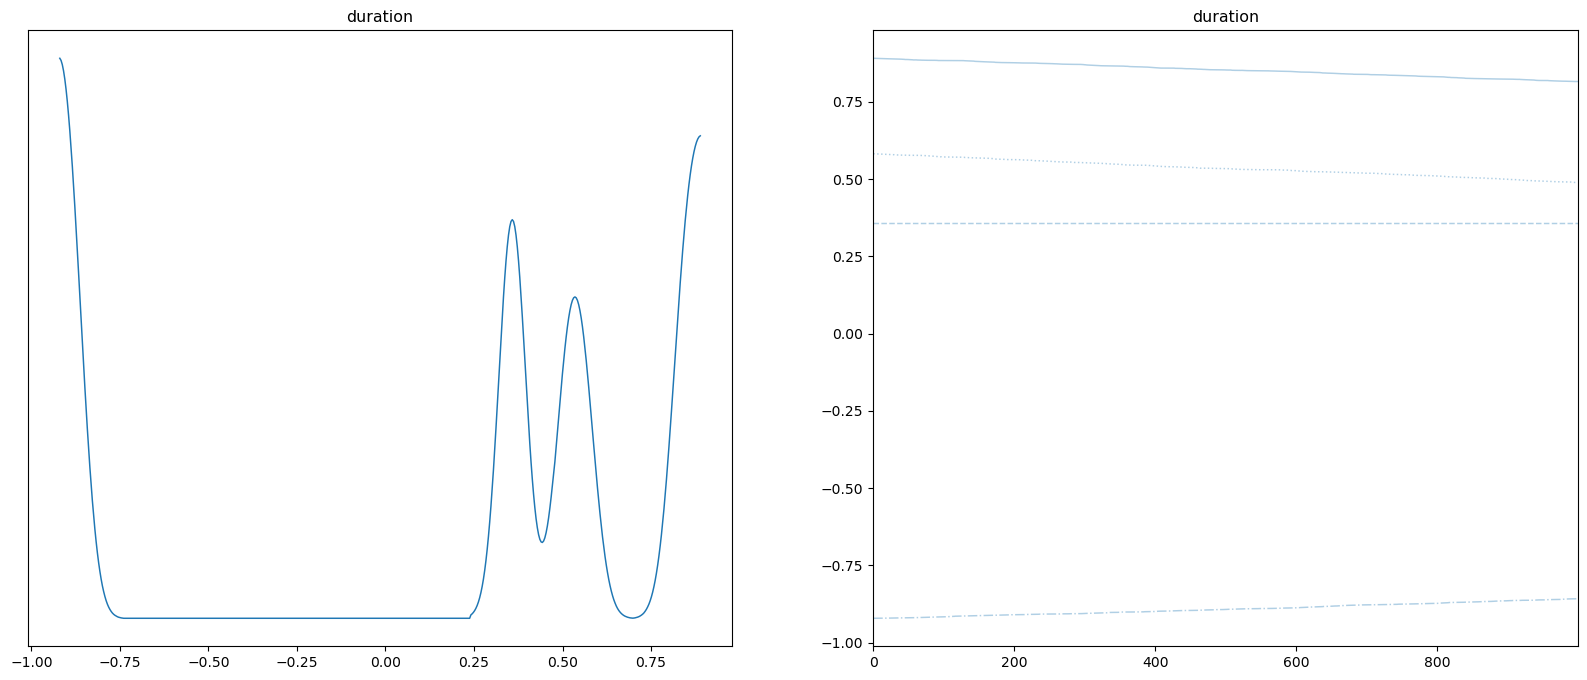

In [9]:
var_names = ('Intercept','nr.employed', 'euribor3m', 'age', 'duration')

# Loop through each variable and create separate plots
for var_name in var_names:
    az.plot_trace(result_2, var_names=var_name, combined=True, compact=True,figsize = (20, 8))
    plt.show()

In [10]:
az.summary(result_2)

mean       sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept    57.818  227.662 -114.697  452.631    113.368   86.802       4.0   
nr.employed  -0.416    0.309   -0.937   -0.149      0.154    0.118       4.0   
euribor3m    -0.441    0.259   -0.872   -0.192      0.129    0.099       4.0   
age           0.143    0.449   -0.490    0.742      0.224    0.171       4.0   
duration      0.214    0.663   -0.921    0.874      0.330    0.253       4.0   

             ess_tail  r_hat  
Intercept        11.0   3.87  
nr.employed      14.0   3.36  
euribor3m        17.0   3.53  
age              11.0   3.29  
duration         11.0   4.35

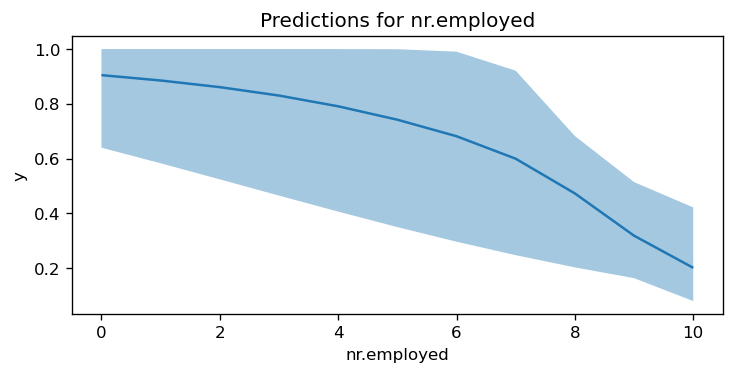

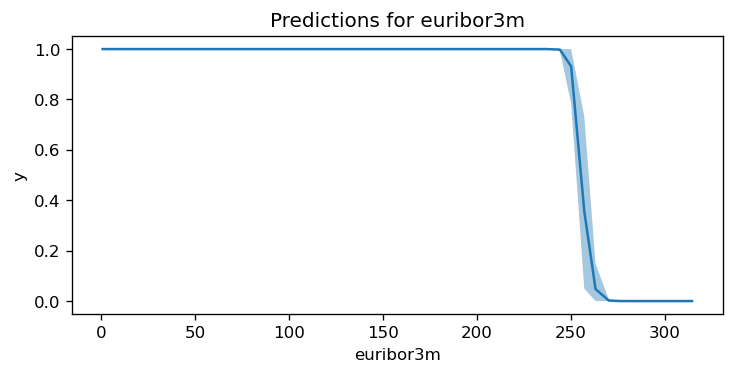

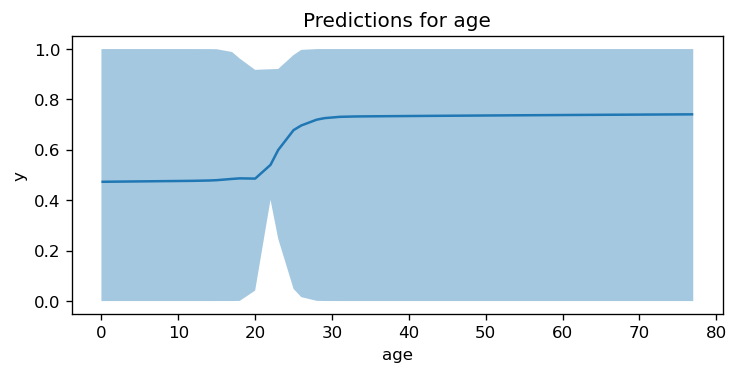

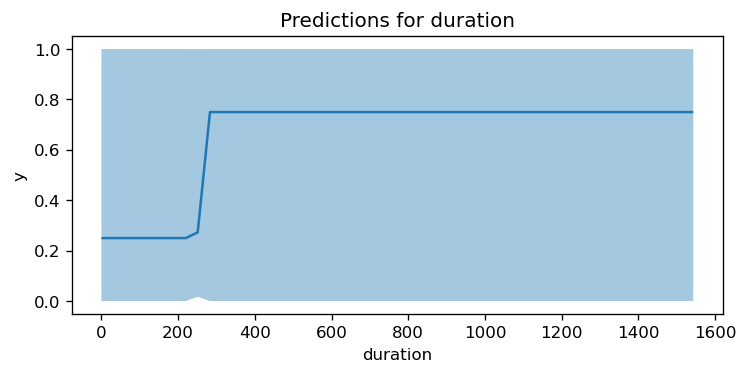

In [11]:
var_names = ('nr.employed', 'euribor3m', 'age', 'duration')

# Loop through each variable and create separate plots
for var_name in var_names:
    fig, ax = plt.subplots(figsize=(7, 3), dpi=120)
    bmb.interpret.plot_predictions(model_2, result_2, var_name, ax=ax)
    ax.set_title(f"Predictions for {var_name}")
    plt.show()

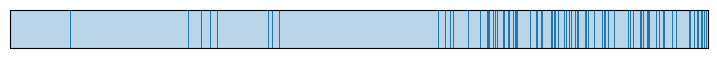

In [13]:
model_3.predict(result_2, kind="pps")
ax = az.plot_separation(result_2, y='y', figsize=(9,0.5))

# Model comparison

In [117]:
az.waic(result_1)

Computed from 4000 posterior samples and 41188 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -8992143.99  623393.87
p_waic    8761050.22        -

There has been a warning during the calculation. Please check the results.

In [12]:
az.waic(result_2)

Computed from 4000 posterior samples and 41188 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -8800874.98  16490.09
p_waic    8742711.12        -

There has been a warning during the calculation. Please check the results.